In [1]:
#Se importan las liberias necesarias
import pandas as pd
import numpy as np

In [2]:
#Se importa el csv con la data limpia
#Se utiliza el codigo sep, porque el archivo se delimita por comas  ","
#Se utliza el codigo index_col, para utlizar la primer columna como index
rawData = pd.read_csv('default of credit card clients.csv', sep=",",index_col=0)
rawData.head()

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,graduate school,high school,other,university,default,not default,others,married,single,divorved
0,1,20000,24,2,2,-1,-1,-2,-2,3913,...,0,0,0,1,1,0,0,1,0,0
1,2,120000,26,-1,2,0,0,0,2,2682,...,0,0,0,1,1,0,0,0,1,0
2,3,90000,34,0,0,0,0,0,0,29239,...,0,0,0,1,0,1,0,0,1,0
3,4,50000,37,0,0,0,0,0,0,46990,...,0,0,0,1,0,1,0,1,0,0
4,5,50000,57,-1,0,-1,0,0,0,8617,...,0,0,0,1,0,1,0,1,0,0


In [3]:
rawData.columns

Index(['ID', 'LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'female', 'male', 'graduate school',
       'high school', 'other', 'university', 'default', 'not default',
       'others', 'married', 'single', 'divorved'],
      dtype='object')

In [4]:
#Se revisan las variables
rawData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 30202
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               30000 non-null  int64
 1   LIMIT_BAL        30000 non-null  int64
 2   AGE              30000 non-null  int64
 3   PAY_0            30000 non-null  int64
 4   PAY_2            30000 non-null  int64
 5   PAY_3            30000 non-null  int64
 6   PAY_4            30000 non-null  int64
 7   PAY_5            30000 non-null  int64
 8   PAY_6            30000 non-null  int64
 9   BILL_AMT1        30000 non-null  int64
 10  BILL_AMT2        30000 non-null  int64
 11  BILL_AMT3        30000 non-null  int64
 12  BILL_AMT4        30000 non-null  int64
 13  BILL_AMT5        30000 non-null  int64
 14  BILL_AMT6        30000 non-null  int64
 15  PAY_AMT1         30000 non-null  int64
 16  PAY_AMT2         30000 non-null  int64
 17  PAY_AMT3         30000 non-null  int64
 18  PAY_AM

In [5]:
#Definicions de variables independientes
x = rawData.iloc[:,3:9]
x

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,2,2,-1,-1,-2,-2
1,-1,2,0,0,0,2
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,-1,0,-1,0,0,0
...,...,...,...,...,...,...
30198,0,0,0,0,0,0
30199,-1,-1,-1,-1,0,0
30200,4,3,2,-1,0,0
30201,1,-1,0,0,0,-1


In [6]:
#Definicion de variable dependiente
y = rawData["not default"]
y

0        0
1        0
2        1
3        1
4        1
        ..
30198    1
30199    1
30200    0
30201    0
30202    0
Name: not default, Length: 30000, dtype: int64

In [7]:
#Importacion de liberia Sklearn
from sklearn.linear_model import LinearRegression

In [8]:
model=LinearRegression()

In [9]:
# Importacion de liberias
import numpy as np
import pandas as pd
import scipy 
from math import sqrt
import matplotlib.pyplot as plt

#Importacion de estimadores

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

# Modelo de metricas

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#Validacion cruzada
#from sklearn.cross_validation  import  train_test_split
from sklearn.model_selection import train_test_split

In [10]:
#Validacion cruzada para cada modelo
print(cross_val_score(model,x,y,cv=3))

[0.0936071  0.11887959 0.11223656]


In [11]:
#Creacion de listas para cada algoritmo de regression

algosClass=[]

algosClass.append(("Random Forest Regressor",RandomForestRegressor()))

algosClass.append(("Linear Regression",LinearRegression()))

algosClass.append(("Support Vector Regression",SVR()))

In [12]:
#Algoritmo para obtener r2 al cuadrado paraa cada modelo de regresion
results=[]
names=[]

for name, model in algosClass:
        result=cross_val_score(model,x,y,cv=3,scoring="r2")
        names.append(name)
        results.append(result)
        
for i in range (len(names)):
    print(names[i],results[i].mean())

Random Forest Regressor 0.17241924944483422
Linear Regression 0.10824108525601357
Support Vector Regression 0.1239847810059694


In [13]:
#Division del set datos en 20% en test y 80% en train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(24000, 6) (6000, 6) (24000,) (6000,)


In [14]:
#Seleccion de modelo y puesta de variables de entrenamiento
algo=RandomForestRegressor()

models=algo.fit(x_train,y_train)

In [15]:
#Puesta en marcha de predicciones del modelo
predictions=models.predict(x_test)

In [16]:
#Importacion de librerias de metricas MSE (error cuadratico medio) Y R2 (error cuadratico)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

In [17]:
#Algoritmo para calcular RMSE (Raiz del erro cuadratico medio (MSE)) y comparar las predicciones
rmse=sqrt(mean_squared_error(y_test,predictions))

In [18]:
#Algoritmo para comparar las predcciones con r2
predRsquared=r2_score(y_test,predictions)

In [19]:
print("R squared: %.3f" % predRsquared)
print("RMSE:%.3f" % rmse)

R squared: 0.182
RMSE:0.378


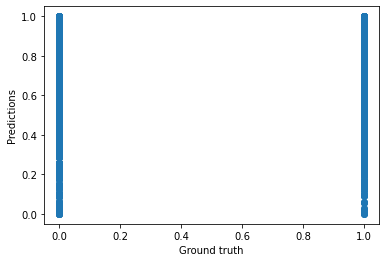

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(x=y_test,y=predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")
plt.show()

In [21]:
rawData2 = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
rawData2

,Actual,Predicted
18280,0,0.895362
2690,0,0.846531
17402,1,0.895362
24589,1,0.905933
28309,1,0.864707
...,...,...
29955,1,0.649118
25504,1,0.895362
12849,1,0.864707
26315,1,0.649118


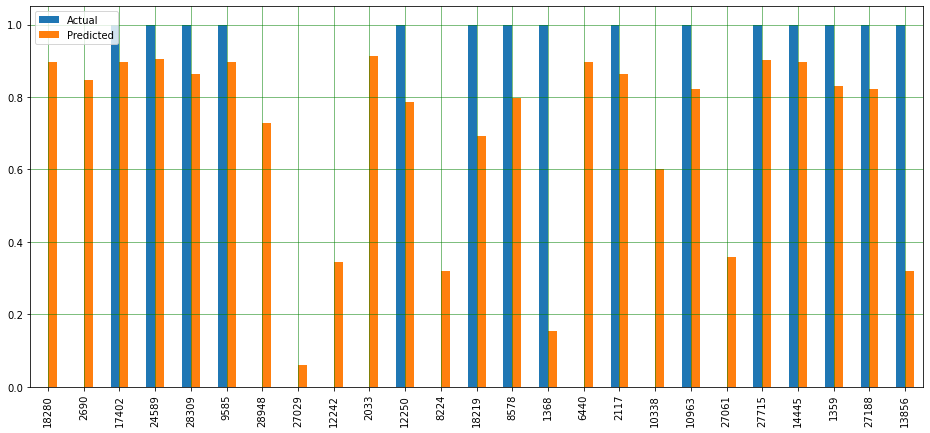

In [22]:
rawData3 = rawData2.head(25)
rawData3.plot(kind='bar',figsize=(16,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()